In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
% matplotlib inline
import seaborn as sns 
import math 

import pickle 

In [3]:
# load the model built in somes other notebooks from disk
filename = 'tuned_model.sav'

loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# data from LN market 

### Data perp 

In [56]:
d = pd.read_csv('MKTCAP_LN.csv', encoding = 'cp932')
d.head()

,ddate,security_code,時価総額,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,...,営業資産,営業負債,有形固定,使用資産,ROIC,EY,MAGIC,ROIC2,EY2,MKTCAP
0,2000,AAL,0.0000,14824.000,2368.000,1957.000,30616.000,1061.000,2344.000,8127.000,...,4722.000,-4027.000,11819.000,12514.000,0.189228,inf,inf,0.114236,0.401220,0.0000
1,2000,ABF,3385.8000,4406.000,327.000,138.000,3867.000,65.000,1133.000,2220.000,...,1022.000,-735.000,1459.000,1746.000,0.187285,0.096580,0.265137,0.111833,0.092430,3385.8000
2,2000,ACL,121.9050,245.360,13.484,8.232,146.453,8.461,0.000,86.766,...,78.305,-54.935,9.342,32.712,0.412203,0.110611,0.481594,0.390139,0.092395,121.9050
3,2000,ADB,0.0000,32.645,2.448,1.466,23.528,0.412,0.000,6.764,...,6.352,-5.785,16.087,16.654,0.146992,inf,inf,0.185581,0.528041,0.0000
4,2000,ADN,846.9825,115.721,34.225,24.126,274.148,45.815,3.054,91.628,...,42.759,-81.432,11.307,-27.366,-1.250639,0.040408,-1.085167,0.306294,0.041408,846.9825


In [57]:
# drop all rows with zero MKTCAP and all columns with zero values only 
cols = d.columns[(d == 0).all()]
df2 = d.drop(cols, axis = 1)

df3 = df2[df2['MKTCAP'] != 0]

# remove NAN
df = df3.dropna()

In [17]:
df.groupby('ddate').count()

,security_code,時価総額,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,...,営業資産,営業負債,有形固定,使用資産,ROIC,EY,MAGIC,ROIC2,EY2,MKTCAP
ddate,,,,,,,,,,,,,,,,,,,,,
2000,308,308,308,308,308,308,308,308,308,308,...,308,308,308,308,308,308,308,308,308,308
2001,342,342,342,342,342,342,342,342,342,342,...,342,342,342,342,342,342,342,342,342,342
2002,355,355,355,355,355,355,355,355,355,355,...,355,355,355,355,355,355,355,355,355,355
2003,348,348,348,348,348,348,348,348,348,348,...,348,348,348,348,348,348,348,348,348,348
2004,396,396,396,396,396,396,396,396,396,396,...,396,396,396,396,396,396,396,396,396,396
2005,455,455,455,455,455,455,455,455,455,455,...,455,455,455,455,455,455,455,455,455,455
2006,484,484,484,484,484,484,484,484,484,484,...,484,484,484,484,484,484,484,484,484,484
2007,602,602,602,602,602,602,602,602,602,602,...,602,602,602,602,602,602,602,602,602,602
2008,606,606,606,606,606,606,606,606,606,606,...,606,606,606,606,606,606,606,606,606,606


In [33]:
# MKTCAP from 2016 as y
df2016 = df[df['ddate'] ==2016][['security_code', 'MKTCAP']]

df2016.head()

,security_code,MKTCAP
15119,AA/,1515.645600
15121,AAL,15690.662460
15124,AAZ,20.842300
15125,ABC,1598.167339
15126,ABDP,83.138200


In [45]:
# feature xs are data from 2015
# feature columns
collist = list(df.columns[1:61])
df2015 = df[df['ddate'] == 2015][collist]

# delete the '時価総額' column
del df2015['時価総額']
df2015.head()

,security_code,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,有形固定資産,...,株主資本,販管費,売上総利益率,営業利益率,株主還元,純現金資産,営業資産,営業負債,有形固定,使用資産
13759,AAL,20455.0000,-4261.0000,-5624.000,52013.0000,6895.0000,0.0,13797.000,846.0,29621.0000,...,21342.0000,-3237.0000,-0.050061,-0.208311,0.0,-10226.0000,6902.0000,-4207.000,29621.0000,32316.0000
13762,AAZ,78.0570,-2.9400,-7.381,172.0410,0.2490,0.0,42.577,0.0,112.2880,...,78.6440,-5.7630,0.036166,-0.037665,0.0,-49.0470,42.3280,-20.112,112.2880,134.5040
13763,ABC,144.0330,46.3700,37.384,249.9460,57.0590,0.0,100.522,0.0,12.4510,...,214.1040,-55.1560,0.704880,0.321940,0.0,57.0590,43.4630,-21.058,12.4510,34.8560
13764,ABDP,16.5226,3.7743,3.246,16.9099,7.9678,0.0,15.134,0.0,1.7273,...,13.6499,-1.5757,0.323799,0.228433,0.0,7.9678,7.1662,-3.260,1.7273,5.6335
13765,ABF,12800.0000,890.0000,528.000,10219.0000,702.0000,0.0,3849.000,0.0,4518.0000,...,6511.0000,-2129.0000,0.235859,0.069531,0.0,-194.0000,3147.0000,-2423.000,4518.0000,5242.0000


In [133]:
# inner join df2015 and df2016 on security_code to get companies that exist in both years
data = pd.merge(df2015, df2016, how = 'inner', on = 'security_code')
data.head()

,security_code,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,有形固定資産,...,販管費,売上総利益率,営業利益率,株主還元,純現金資産,営業資産,営業負債,有形固定,使用資産,MKTCAP
0,AAL,20455.0000,-4261.0000,-5624.000,52013.0000,6895.0000,0.0,13797.000,846.0,29621.0000,...,-3237.0000,-0.050061,-0.208311,0.0,-10226.0000,6902.0000,-4207.000,29621.0000,32316.0000,15690.662460
1,AAZ,78.0570,-2.9400,-7.381,172.0410,0.2490,0.0,42.577,0.0,112.2880,...,-5.7630,0.036166,-0.037665,0.0,-49.0470,42.3280,-20.112,112.2880,134.5040,20.842300
2,ABC,144.0330,46.3700,37.384,249.9460,57.0590,0.0,100.522,0.0,12.4510,...,-55.1560,0.704880,0.321940,0.0,57.0590,43.4630,-21.058,12.4510,34.8560,1598.167339
3,ABDP,16.5226,3.7743,3.246,16.9099,7.9678,0.0,15.134,0.0,1.7273,...,-1.5757,0.323799,0.228433,0.0,7.9678,7.1662,-3.260,1.7273,5.6335,83.138200
4,ABF,12800.0000,890.0000,528.000,10219.0000,702.0000,0.0,3849.000,0.0,4518.0000,...,-2129.0000,0.235859,0.069531,0.0,-194.0000,3147.0000,-2423.000,4518.0000,5242.0000,20844.781200


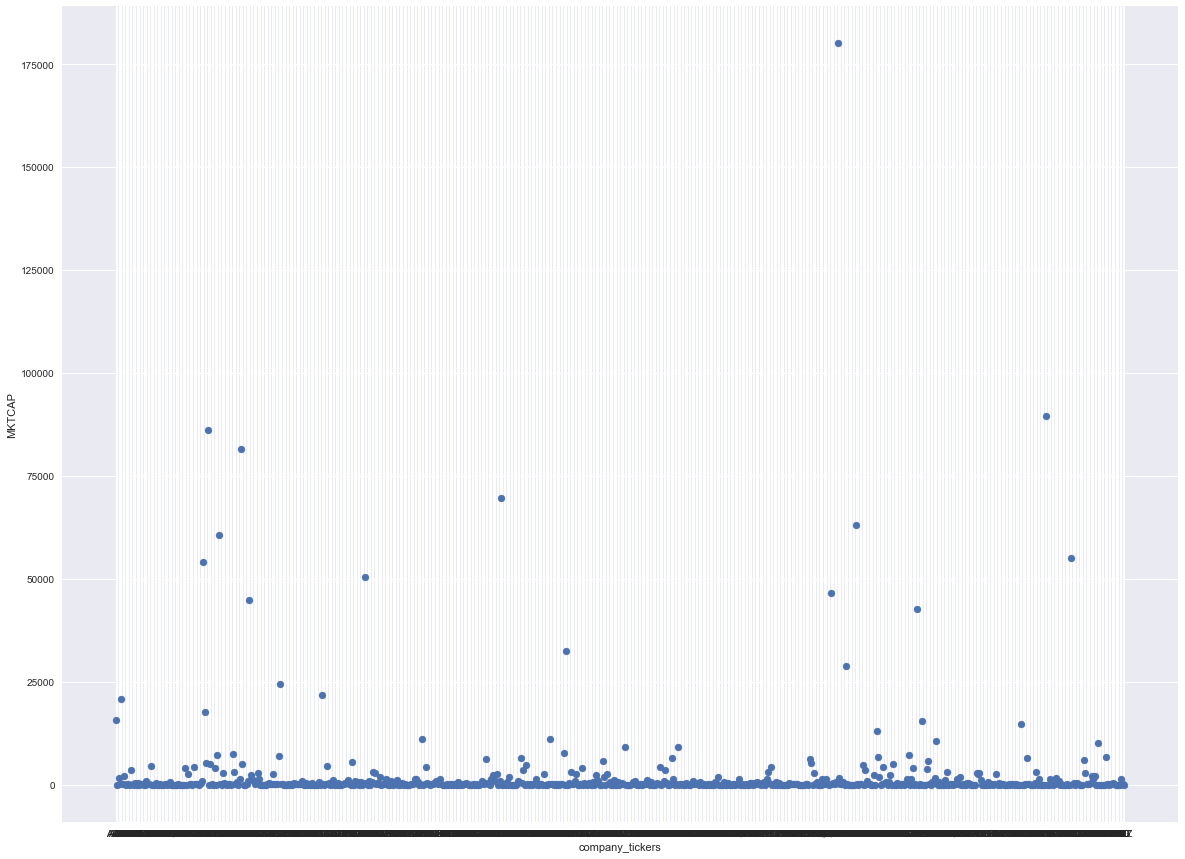

In [148]:
fig = plt.figure(figsize = (20, 15))

num = len(data['security_code'])
x = np.arange(num)
y = data['MKTCAP']

my_xticks = list(data['security_code'].values)
plt.xticks(x, my_xticks)
plt.scatter(x, y)
plt.xlabel('company_tickers')
plt.ylabel('MKTCAP')

plt.show()

In [51]:
# list of feature columns 
featurelist = data.columns[1:59]

In [90]:
# data.info()

In [121]:
# loc = data[['売上総利益率', '営業利益率']].values == float('-inf')
# data[['売上総利益率', '営業利益率']][loc]

In [139]:
# remove the float('-inf') values, which come from EXCEL
# replace them with nan first, then drop
data1 = data.replace([float('-inf'), float('inf')], np.nan).dropna()

# double check
sum(data1.values == float('-inf'))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [141]:
# score from model on unseen data
loaded_model.score(data1[featurelist], data1['MKTCAP'])

0.76099883522915968

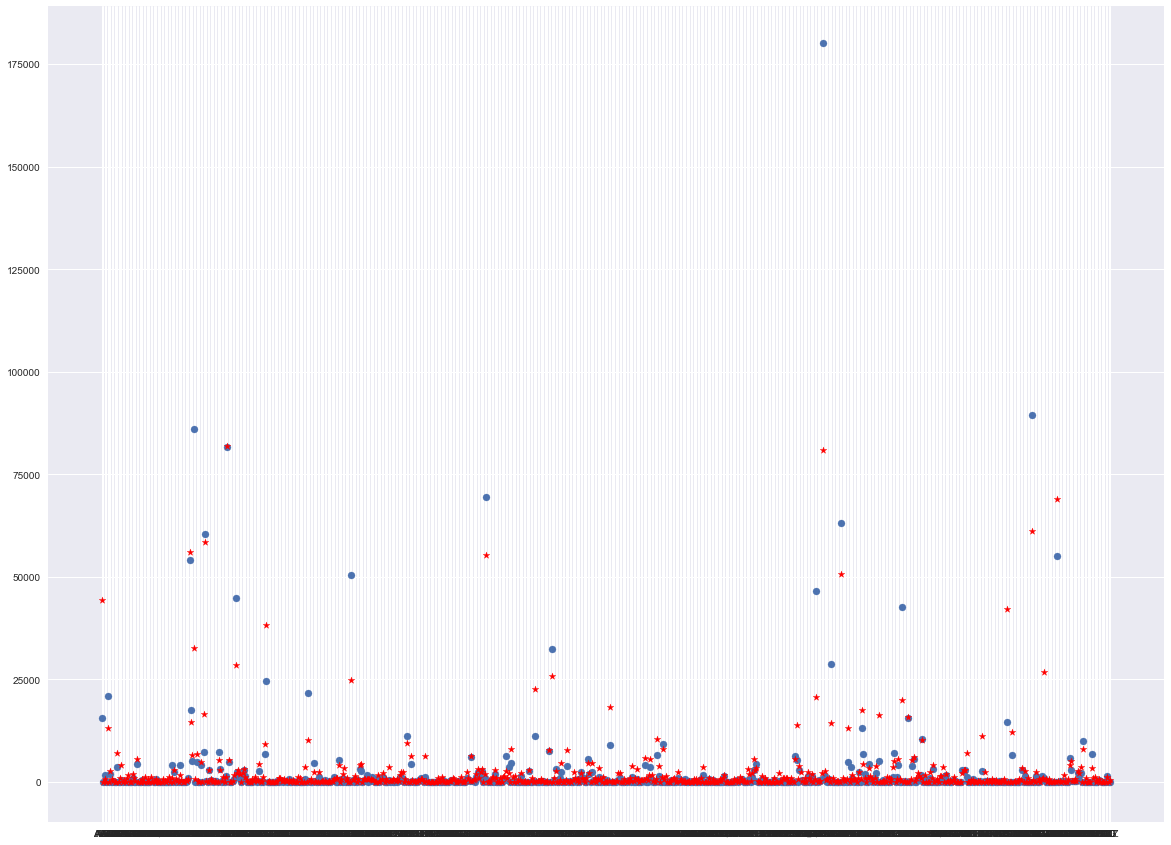

In [147]:
fig = plt.figure(figsize = (20,15))
ax = plt.subplot(1, 1, 1)

num_predict = len(data1['security_code'])
x = np.arange(num_predict)
y = data1['MKTCAP'].values
my_xticks = list(data1['security_code'].values)
plt.xticks(x, my_xticks)   # blue dots are actual values 
plt.scatter(x, y)

# ax. scatter(x_test, regr.predict(x_test))

y2 = loaded_model.predict(data1[featurelist])
plt.xticks(x, my_xticks)

ax.scatter(x, y2, color = 'red', marker = '*')  # red stars are predicted MKTCAP from the tuned model

plt.show()

In [211]:
import math 
predicts = loaded_model.predict(data1[featurelist])

sse = []
for i in range(len(predicts)):
    sse.append(math.log10((data1['MKTCAP'].iloc[i] - predicts[i]) **2))
    
MSE = sum(sse)/len(predicts)
MSE

4.334452756706301

In [158]:
a = pd.DataFrame(loaded_model.predict(data1[featurelist]))
b = data1['MKTCAP']

pd.concat([a,b], axis = 1).head()

,0,MKTCAP
0,44293.346681,15690.662460
1,100.492410,20.842300
2,698.098865,1598.167339
3,45.044191,83.138200
4,13136.229766,20844.781200


In [179]:
#  correlation among features 

# fig = plt.figure(figsize = (15, 15))
# ax = fig.add_subplot(1, 1, 1)

# correlations = data1.corr()
# cax = ax.matshow(correlations, vmin = -1, vmax = 1)
# fig.colorbar(cax)

# num_feat = len(featurelist)
# ticks = np.arange(num_feat)
# ax.set_xticks(ticks)
# ax.set_yticks(ticks)
# ax.set_xticklabels(featurelist)
# ax.set_yticklabels(featurelist)

# plt.show()

In [184]:
correlations = data1.corr()
correlations

,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,有形固定資産,短期借入金,...,販管費,売上総利益率,営業利益率,株主還元,純現金資産,営業資産,営業負債,有形固定,使用資産,MKTCAP
売上,1.000000,-0.221760,-0.023799,0.952907,0.964649,0.172783,0.979179,0.649774,0.928385,0.591444,...,-0.894825,-0.011989,0.011256,0.008604,-0.749657,0.979296,-0.976399,0.928674,0.915113,0.808110
営業利益,-0.221760,1.000000,0.848662,-0.073509,-0.162049,-0.033171,-0.152758,0.124750,-0.138051,0.094970,...,0.225562,0.026921,0.009893,-0.063678,-0.156120,-0.145539,0.115638,-0.138794,-0.147616,0.300621
純利益,-0.023799,0.848662,1.000000,0.123153,0.016093,0.180901,0.061492,0.345681,-0.024818,0.357160,...,-0.074413,0.032653,0.009909,-0.093561,-0.279882,0.064186,-0.099493,-0.025495,-0.041921,0.417956
総資産,0.952907,-0.073509,0.123153,1.000000,0.971299,0.289254,0.974408,0.794481,0.955211,0.742127,...,-0.844747,-0.009302,0.012570,-0.013621,-0.879026,0.952985,-0.959019,0.955296,0.940349,0.856712
現金･現金同等物,0.964649,-0.162049,0.016093,0.971299,1.000000,0.167665,0.982333,0.689967,0.939516,0.616782,...,-0.861764,-0.009310,0.010790,0.009002,-0.781546,0.965245,-0.954355,0.939735,0.930025,0.810687
有価証券,0.172783,-0.033171,0.180901,0.289254,0.167665,1.000000,0.249360,0.392152,0.192908,0.574270,...,-0.191001,-0.011819,0.007223,0.006789,-0.413242,0.168730,-0.259059,0.192802,0.158088,0.193189
流動資産,0.979179,-0.152758,0.061492,0.974408,0.982333,0.249360,1.000000,0.699030,0.927258,0.643451,...,-0.899464,-0.007738,0.012664,0.005052,-0.797029,0.992233,-0.980837,0.927429,0.916400,0.845579
総長期投資,0.649774,0.124750,0.345681,0.794481,0.689967,0.392152,0.699030,1.000000,0.677551,0.870028,...,-0.578139,-0.004659,0.009880,0.009152,-0.799175,0.663504,-0.717066,0.677272,0.649105,0.653689
有形固定資産,0.928385,-0.138051,-0.024818,0.955211,0.939516,0.192908,0.927258,0.677551,1.000000,0.581339,...,-0.753384,-0.020030,0.010380,-0.028331,-0.797922,0.909092,-0.891723,0.999998,0.996805,0.780434
短期借入金,0.591444,0.094970,0.357160,0.742127,0.616782,0.574270,0.643451,0.870028,0.581339,1.000000,...,-0.566264,-0.005524,0.013194,-0.037623,-0.842563,0.593266,-0.656839,0.581389,0.549746,0.637480


In [185]:
from sklearn import tree

i_tree = 1
for tree_in_forest in loaded_model.estimators_:
    with open('tree_' + str(i_tree) + '.dot', 'w') as my_file:
        my_file = tree.export_graphviz(tree_in_forest, out_file = my_file)
#     i_tree = i_tree + 1

In [216]:
# tree_in_forest.tree_.threshold
from inspect import getmembers
# print (getmembers(loaded_model.tree_))
# print (getmembers(loaded_model.n_features_))

In [217]:
def leaf_depths(tree, node_id = 0):

    '''
    tree.children_left and tree.children_right store ids of left and right chidren of a given node
    '''
    left_child = tree.children_left[node_id]
    right_child = tree.children_right[node_id]

    '''
    If a given node is terminal, both left and right children are set to _tree.TREE_LEAF
    '''
    if left_child == _tree.TREE_LEAF:

        '''
        Set depth of terminal nodes to 0
        '''
        depths = np.array([0])

    else:

        '''
        Get depths of left and right children and increment them by 1
        '''
        left_depths = leaf_depths(tree, left_child) + 1
        right_depths = leaf_depths(tree, right_child) + 1

        depths = np.append(left_depths, right_depths)

    return depths

In [218]:
# visualize trees in the forest 

def draw_tree(forest, tree_id=0):

    plt.figure(figsize=(15, 15))
    plt.subplot(2, 1, 1)

    tree = forest.estimators_[tree_id].tree_

    depths = leaf_depths(tree)
    plt.hist(depths, histtype='step', color='#9933ff', bins=range(min(depths), max(depths)+1))

    plt.xlabel("Depth of leaf nodes (tree %s)" % tree_id)

    plt.subplot(2, 1, 2)

    samples = leaf_samples(tree)
    plt.hist(samples, histtype='step', color='#3399ff', bins = range(min(samples), max(samples)+1))

    plt.xlabel("Number of samples in leaf nodes (tree %s)" % tree_id)

    plt.show()

In [219]:
def leaf_samples(tree, node_id = 0):

    left_child = tree.children_left[node_id]
    right_child = tree.children_right[node_id]

    if left_child == _tree.TREE_LEAF:

        samples = np.array([tree.n_node_samples[node_id]])

    else:

        left_samples = leaf_samples(tree, left_child)
        right_samples = leaf_samples(tree, right_child)

        samples = np.append(left_samples, right_samples)

    return samples

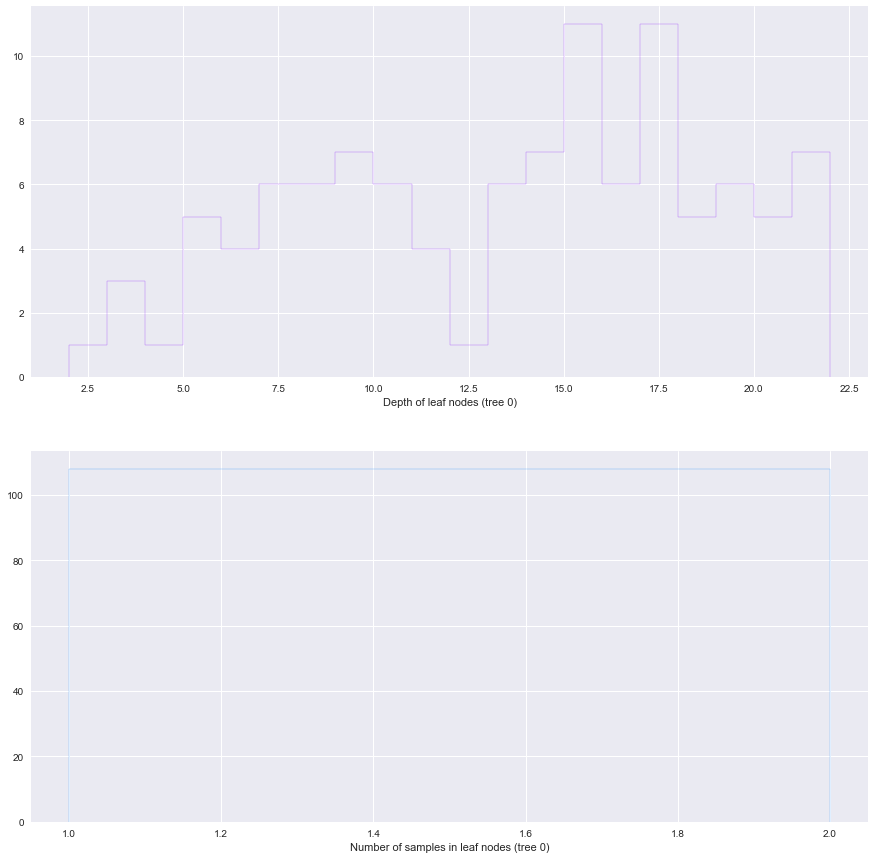

In [220]:
from sklearn.tree import _tree
draw_tree(loaded_model)

In [221]:
# visualize the entire forest

def draw_ensemble(forest):

    plt.figure(figsize=(15, 15))
    plt.subplot(2, 1, 1)

    depths_all = np.array([], dtype=int)

    for x in forest.estimators_:
        tree = x.tree_
        depths = leaf_depths(tree)
        depths_all = np.append(depths_all, depths)
        plt.hist(depths, histtype='step', color='#ddaaff', 
        bins=range(min(depths), max(depths)+1))

    plt.hist(depths_all, histtype='step', color='#9933ff', 
    bins=range(min(depths_all), max(depths_all)+1), 
    weights=np.ones(len(depths_all))/len(forest.estimators_), 
    linewidth=2)
    plt.xlabel("Depth of leaf nodes")

    samples_all = np.array([], dtype=int)

    plt.subplot(2, 1, 2)

    for x in forest.estimators_:
        tree = x.tree_
        samples = leaf_samples(tree)
        samples_all = np.append(samples_all, samples)
        plt.hist(samples, histtype='step', color='#aaddff', 
        bins=range(min(samples), max(samples)+1))

    plt.hist(samples_all, histtype='step', color='#3399ff', 
    bins=range(min(samples_all), max(samples_all)+1), 
    weights=np.ones(len(samples_all))/len(forest.estimators_), 
    linewidth=2)
    plt.xlabel("Number of samples in leaf nodes")

    plt.show()

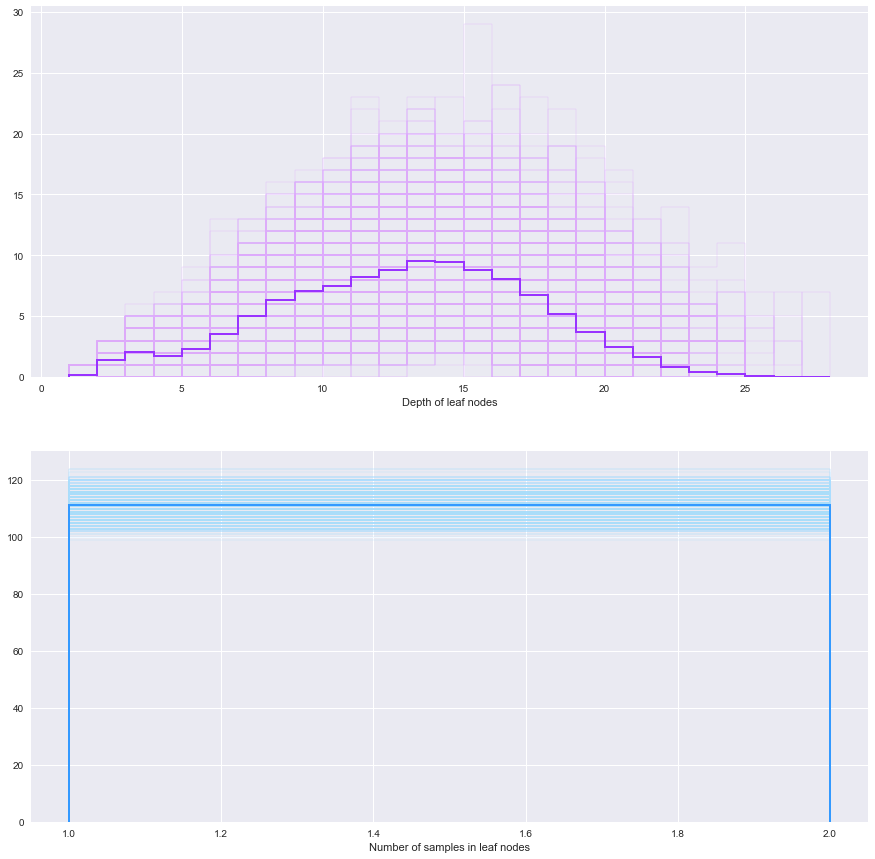

In [222]:
draw_ensemble(loaded_model)